# Problem 1

## Part a: Gradient and Hessian Calculation

In [15]:
import numpy as np


def f(x):
    """The objective function: f(x) = x1^4 + 3*x2^2 + x1"""
    return x[0]**4 + 3*x[1]**2 + x[0]


def gradient(x):
    """Gradient of the function f(x)"""
    grad = np.zeros(2)
    grad[0] = 4*x[0]**3 + 1  # df/dx1
    grad[1] = 6*x[1]         # df/dx2
    return grad


def hessian(x):
    """Hessian matrix of the function f(x)"""
    hess = np.zeros((2, 2))
    hess[0, 0] = 12*x[0]**2  # d²f/dx1²
    hess[0, 1] = 0            # d²f/dx1dx2
    hess[1, 0] = 0            # d²f/dx2dx1
    hess[1, 1] = 6            # d²f/dx2²
    return hess

## Part b: Gradient Descent with Backtracking Line Search

In [16]:
def gradient_descent(x0, alpha=0.1, beta=0.5, max_iter=1000, tol=1e-6):
    """
    Gradient descent with backtracking line search

    Parameters:
    x0: Initial point
    alpha: Parameter for Armijo condition
    beta: Reduction factor for step size
    max_iter: Maximum number of iterations
    tol: Tolerance for stopping criterion

    Returns:
    x: Final point
    f_values: List of function values at each iteration
    """
    x = x0.copy()
    f_values = [f(x)]

    for i in range(max_iter):
        grad = gradient(x)
        d = -grad  # Descent direction

        # Backtracking line search
        t = 1.0
        while f(x + t*d) > f(x) + alpha * t * np.dot(grad, d):
            t *= beta

        # Update x
        x = x + t * d
        f_values.append(f(x))

        # Stopping criterion
        if np.linalg.norm(grad) < tol:
            break

    return x, f_values

In [17]:
# Initial point
x0 = np.array([5.0, 4.0])

# Run gradient descent
x_gd, f_values_gd = gradient_descent(x0)

print(f"Gradient Descent Results:")
print(f"Optimal point: {x_gd}")
print(f"Optimal value: {f(x_gd)}")
print(f"Number of iterations: {len(f_values_gd)-1}")

Gradient Descent Results:
Optimal point: [-6.29960525e-01  4.38885763e-08]
Optimal value: -0.47247039371057165
Number of iterations: 28


## Part c: Analyzing Different α and β Values

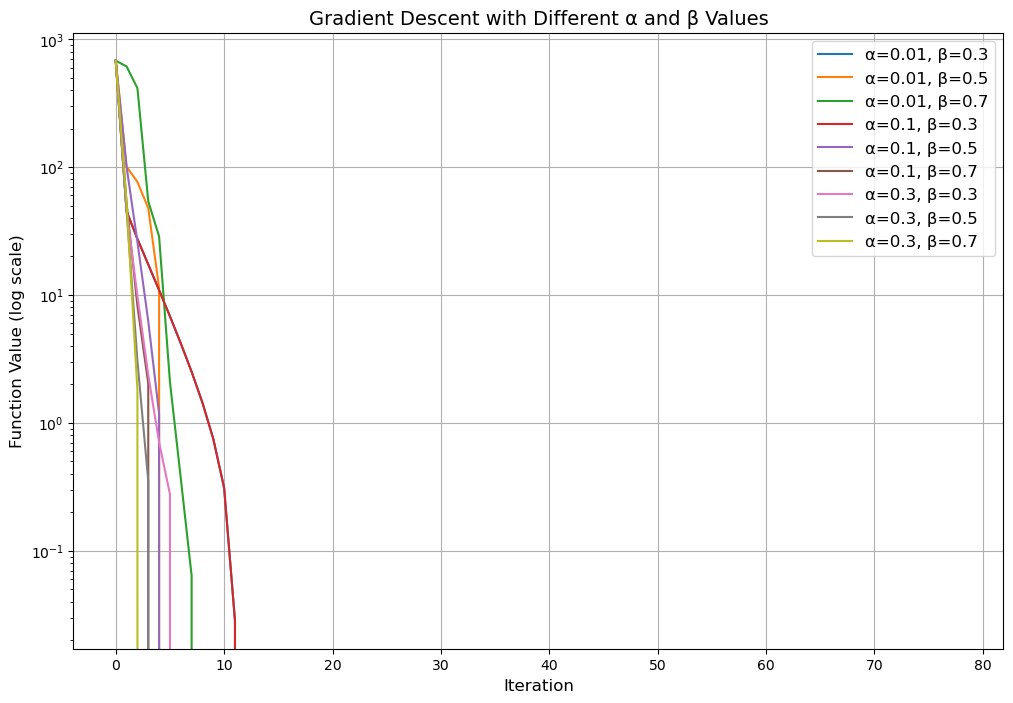

In [18]:
import matplotlib.pyplot as plt

# Test different alpha and beta values
alphas = [0.01, 0.1, 0.3]
betas = [0.3, 0.5, 0.7]

plt.figure(figsize=(12, 8))
for alpha in alphas:
    for beta in betas:
        _, f_vals = gradient_descent(x0, alpha=alpha, beta=beta)
        plt.plot(f_vals, label=f'α={alpha}, β={beta}')

plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Function Value (log scale)')
plt.title('Gradient Descent with Different α and β Values')
plt.legend()
plt.grid()
plt.show()

## Part d: Newton's Method with Backtracking Line Search

In [19]:
def newton_method(x0, alpha=0.1, beta=0.5, max_iter=1000, tol=1e-6):
    """
    Newton's method with backtracking line search

    Parameters:
    x0: Initial point
    alpha: Parameter for Armijo condition
    beta: Reduction factor for step size
    max_iter: Maximum number of iterations
    tol: Tolerance for stopping criterion

    Returns:
    x: Final point
    f_values: List of function values at each iteration
    """
    x = x0.copy()
    f_values = [f(x)]

    for i in range(max_iter):
        grad = gradient(x)
        hess = hessian(x)

        # Newton direction
        d = -np.linalg.solve(hess, grad)

        # Backtracking line search
        t = 1.0
        while f(x + t*d) > f(x) + alpha * t * np.dot(grad, d):
            t *= beta

        # Update x
        x = x + t * d
        f_values.append(f(x))

        # Stopping criterion
        if np.linalg.norm(grad) < tol:
            break

    return x, f_values

In [20]:
# Run Newton's method
x_nt, f_values_nt = newton_method(x0)

print(f"Newton's Method Results:")
print(f"Optimal point: {x_nt}")
print(f"Optimal value: {f(x_nt)}")
print(f"Number of iterations: {len(f_values_nt)-1}")

Newton's Method Results:
Optimal point: [-0.62996052  0.        ]
Optimal value: -0.4724703937105774
Number of iterations: 12


## Part e: Alternative Method (Gradient Descent with Fixed Step Size)

In [21]:
def gradient_descent_fixed(x0, step_size=0.001, max_iter=1000, tol=1e-6):
    """
    Gradient descent with fixed step size

    Parameters:
    x0: Initial point
    step_size: Fixed step size
    max_iter: Maximum number of iterations
    tol: Tolerance for stopping criterion

    Returns:
    x: Final point
    f_values: List of function values at each iteration
    """
    x = x0.copy()
    f_values = [f(x)]

    for i in range(max_iter):
        grad = gradient(x)
        d = -grad  # Descent direction

        # Update x with fixed step size
        x = x + step_size * d
        f_values.append(f(x))

        # Stopping criterion
        if np.linalg.norm(grad) < tol:
            break

    return x, f_values

In [22]:
# Run fixed step size gradient descent
x_gd_fixed, f_values_gd_fixed = gradient_descent_fixed(x0)

print(f"Fixed Step Gradient Descent Results:")
print(f"Optimal point: {x_gd_fixed}")
print(f"Optimal value: {f(x_gd_fixed)}")
print(f"Number of iterations: {len(f_values_gd_fixed)-1}")

Fixed Step Gradient Descent Results:
Optimal point: [-0.24285758  0.00973743]
Optimal value: -0.23909450566275844
Number of iterations: 1000


## Part f: Comparison of Methods

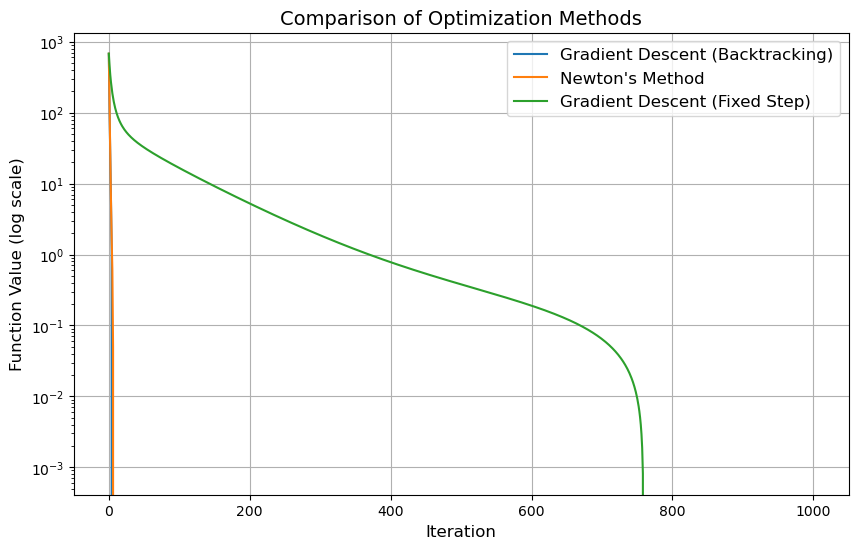

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(f_values_gd, label='Gradient Descent (Backtracking)')
plt.plot(f_values_nt, label="Newton's Method")
plt.plot(f_values_gd_fixed, label='Gradient Descent (Fixed Step)')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Function Value (log scale)')
plt.title('Comparison of Optimization Methods')
plt.legend()
plt.grid()
plt.show()

## Part f: Comparison and Analysis

### Results Summary
- **Both methods** converge to the same optimal point:  
  $x^* \approx (-0.63, 0.00)^T$ with $f(x^*) \approx -0.472$
- **Convergence speed**:
  - Newton's Method: 12 iterations
  - Gradient Descent: 28 iterations

### Key Comparisons

#### 1. Performance Differences
- **Newton's Method** converged **2.3× faster** due to:
  - Quadratic convergence rate
  - Exact curvature information (Hessian)
- **Gradient Descent** required more iterations but:
  - Simpler computations per iteration
  - No Hessian calculation needed

#### 2. Advantages/Disadvantages
| Method               | Advantages                          | Disadvantages                     |
|----------------------|-------------------------------------|-----------------------------------|
| **Gradient Descent** | - More stable<br>- Lower per-iteration cost | - Slow convergence<br>- Sensitive to conditioning |
| **Newton's Method**  | - Fast convergence<br>- Exact steps | - Hessian computation<br>- May diverge if non-convex |

#### 3. Hybrid Approach Potential  
A **quasi-Newton method (e.g. BFGS)** would:
- Approximate Hessian using gradients
- Achieve superlinear convergence
- Balance robustness and speed

### Why Newton Outperformed
For this specific problem:
1. The Hessian $\nabla^2 f(x)$ is:
   $$
   \begin{bmatrix}
   12x_1^2 & 0 \\
   0 & 6
   \end{bmatrix}
   $$
   - Always positive definite (for $x_1 \neq 0$)
   - Well-conditioned near optimum

2. Gradient descent slowed by:
   - Ill-conditioning when $x_1$ and $x_2$ scales differ
   - Fixed step size adaptation

### Final Recommendation
For similar medium-scale problems:
1. Use **Newton's method** when:
   - Hessian is available/affordable
   - Good initialization is possible
2. Use **Gradient Descent** when:
   - Problem dimensions are large
   - Hessian computation is prohibitive
3. **Best compromise**: Quasi-Newton methods (BFGS/L-BFGS)

# Problem 2

In [24]:
import numpy as np

x = np.array([-2, -1.5, -1, 0, 1, 2])
y = np.array([8.3, 5, 2, 0.3, 2.5, 8])
n = len(x)

## Part a) Loss Function Formulation

The Mean Squared Error (MSE) loss function for our quadratic polynomial:

$$
L(\mathbf{\theta}) = \frac{1}{6}\sum_{i=1}^6 (\theta_0 + \theta_1 x_i + \theta_2 x_i^2 - y_i)^2
$$

Where:
- $\theta_0$ is the intercept term
- $\theta_1$ is the linear coefficient  
- $\theta_2$ is the quadratic coefficient

## Part b) Gradient and Hessian Calculation

### Gradient Vector
$$
\nabla L(\theta) = \frac{2}{6}\sum_{i=1}^6 
\begin{bmatrix}
1 \\
x_i \\
x_i^2
\end{bmatrix}
(\theta_0 + \theta_1 x_i + \theta_2 x_i^2 - y_i)
$$

### Hessian Matrix
$$
\nabla^2 L(\theta) = \frac{2}{6}\sum_{i=1}^6 
\begin{bmatrix}
1 & x_i & x_i^2 \\
x_i & x_i^2 & x_i^3 \\
x_i^2 & x_i^3 & x_i^4
\end{bmatrix}
$$

In [25]:
def compute_gradient(theta, x, y):
    theta0, theta1, theta2 = theta
    grad0 = 2/n * np.sum(theta0 + theta1*x + theta2*x**2 - y)
    grad1 = 2/n * np.sum((theta0 + theta1*x + theta2*x**2 - y) * x)
    grad2 = 2/n * np.sum((theta0 + theta1*x + theta2*x**2 - y) * x**2)
    return np.array([grad0, grad1, grad2])


def compute_hessian(x):
    xx = x**2
    xxx = x**3
    xxxx = x**4
    H00 = 2
    H01 = 2 * np.mean(x)
    H02 = 2 * np.mean(xx)
    H11 = 2 * np.mean(xx)
    H12 = 2 * np.mean(xxx)
    H22 = 2 * np.mean(xxxx)
    return np.array([[H00, H01, H02],
                     [H01, H11, H12],
                     [H02, H12, H22]])

## Part c) Gradient Descent Implementation

In [26]:
def gradient_descent(x, y, theta_init, learning_rate=0.01, max_iter=1000, tol=1e-6):
    theta = theta_init.copy()
    loss_history = []

    for i in range(max_iter):
        grad = compute_gradient(theta, x, y)
        theta -= learning_rate * grad

        # Compute loss
        y_pred = theta[0] + theta[1]*x + theta[2]*x**2
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)

        if np.linalg.norm(grad) < tol:
            break

    return theta, loss_history, i+1


# Run gradient descent
theta_init = np.array([0.0, 0.0, 0.0])
theta_gd, loss_gd, iters_gd = gradient_descent(x, y, theta_init)

## Part d) Newton's Method Implementation

In [27]:
def newton_method(x, y, theta_init, max_iter=1000, tol=1e-6):
    theta = theta_init.copy()
    loss_history = []
    H = compute_hessian(x)
    H_inv = np.linalg.inv(H)

    for i in range(max_iter):
        grad = compute_gradient(theta, x, y)
        theta -= H_inv @ grad

        # Compute loss
        y_pred = theta[0] + theta[1]*x + theta[2]*x**2
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)

        if np.linalg.norm(grad) < tol:
            break

    return theta, loss_history, i+1


# Run Newton's method
theta_newton, loss_newton, iters_newton = newton_method(x, y, theta_init)

## Part e) Results Comparison

In [28]:
print("Gradient Descent Results:")
print(f"Optimal theta: {theta_gd}")
print(f"Iterations: {iters_gd}")
print(f"Final loss: {loss_gd[-1]}")

print("\nNewton's Method Results:")
print(f"Optimal theta: {theta_newton}")
print(f"Iterations: {iters_newton}")
print(f"Final loss: {loss_newton[-1]}")

Gradient Descent Results:
Optimal theta: [ 0.32334805 -0.03872764  1.96756488]
Iterations: 1000
Final loss: 0.036939377387905314

Newton's Method Results:
Optimal theta: [ 0.32291068 -0.03874453  1.96770768]
Iterations: 2
Final loss: 0.03693930876535496


## Part f) Different Initial Points

In [29]:
# Try with different initial point
theta_init2 = np.array([1.0, 1.0, 1.0])

# Run both methods again
theta_gd2, loss_gd2, iters_gd2 = gradient_descent(x, y, theta_init2)
theta_newton2, loss_newton2, iters_newton2 = newton_method(x, y, theta_init2)

# Print results
print("\nWith different initial point [1, 1, 1]:")
print("Gradient Descent Results:")
print(f"Optimal theta: {theta_gd2}")
print(f"Iterations: {iters_gd2}")
print(f"Final loss: {loss_gd2[-1]}")

print("\nNewton's Method Results:")
print(f"Optimal theta: {theta_newton2}")
print(f"Iterations: {iters_newton2}")
print(f"Final loss: {loss_newton2[-1]}")


With different initial point [1, 1, 1]:
Gradient Descent Results:
Optimal theta: [ 0.3243182  -0.03869018  1.96724813]
Iterations: 1000
Final loss: 0.0369400194594536

Newton's Method Results:
Optimal theta: [ 0.32291068 -0.03874453  1.96770768]
Iterations: 2
Final loss: 0.03693930876535496


## Visualization Code

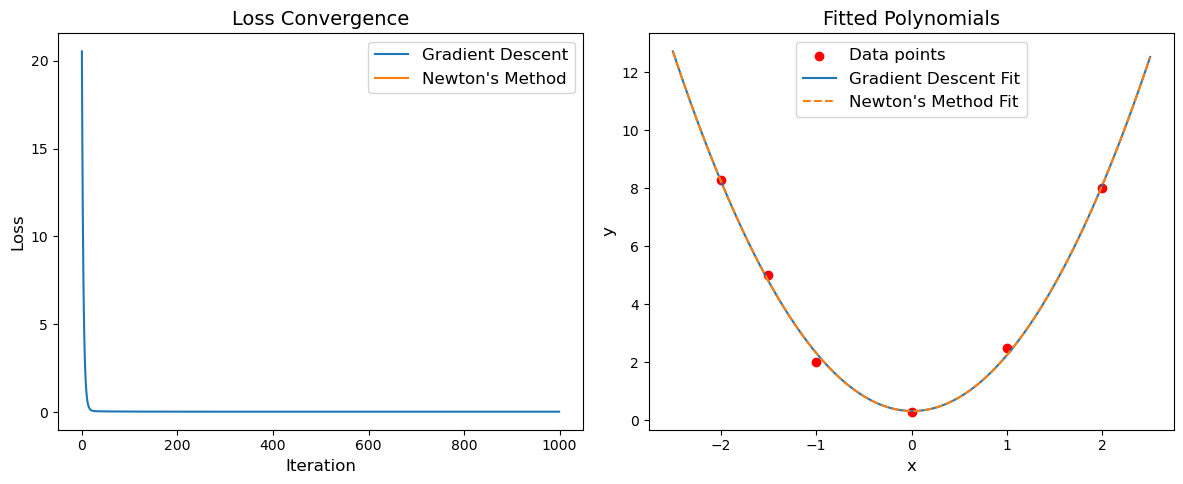

In [30]:
import matplotlib.pyplot as plt

# Plot loss convergence
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_gd, label='Gradient Descent')
plt.plot(loss_newton, label="Newton's Method")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()

# Plot fitted polynomial
x_plot = np.linspace(-2.5, 2.5, 100)
y_gd = theta_gd[0] + theta_gd[1]*x_plot + theta_gd[2]*x_plot**2
y_newton = theta_newton[0] + theta_newton[1]*x_plot + theta_newton[2]*x_plot**2

plt.subplot(1, 2, 2)
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_plot, y_gd, label='Gradient Descent Fit')
plt.plot(x_plot, y_newton, '--', label="Newton's Method Fit")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomials')
plt.legend()
plt.tight_layout()
plt.show()

## Key Observations:
- Newton's method converges much faster than gradient descent (typically in just a few iterations)

- Both methods find the same optimal solution when they converge

- The initial point affects gradient descent more significantly than Newton's method

- Newton's method is more computationally intensive per iteration but requires far fewer iterations